## File: daily_tasks_analysis_graphs.ipynb
#### Summary: This file deepicts graphs of occupations with frequent daily tasks as a test.

#### By: Peyman Shahidi
#### First Created: May 30, 2024

#### Last Edit by Peyman on June 12, 2024

In [1]:
#Python
import os
import getpass
import glob
import numpy as np
import pandas as pd
import random
import networkx as nx

## formatting number to appear comma separated and with two digits after decimal: e.g, 1000 shown as 1,000.00
pd.set_option('float_format', "{:,.2f}".format)

import matplotlib.pyplot as plt
#%matplotlib inline
#from matplotlib.legend import Legend

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 200)

In [2]:
# determine user
user = getpass.getuser()
if user == 'peymansh':
    main_folder_path = '/Users/peymansh/Dropbox (MIT)/Research/AI and Occupations/ai-exposure'
    data_path = f'{main_folder_path}/output'
    output_path = f'{main_folder_path}/output/daily_tasks_occupations_analysis'

## Graphs of Travel Agents

In [3]:
# Read the adjacency matrix
occupation = 'travelAgents'
file_path = f'{data_path}/daily_tasks_occupations_analysis/{occupation}'
adjacency_matrix = pd.read_csv(f'{file_path}/{occupation}_AM_old.csv', index_col=0)

# keep names for node labels
task_names = adjacency_matrix.columns.tolist()
task_names = [x.split()[0] for x in task_names]
node_labels = {value: index for value, index in enumerate(task_names)}
print(node_labels) 

# convert adjacency matrix to numpy array for graph depiction
adjacency_matrix = adjacency_matrix.values

{0: 'Collect', 1: 'Converse', 2: 'Compute', 3: 'Book', 4: 'Plan,', 5: 'Provide', 6: 'Print', 7: 'Record'}


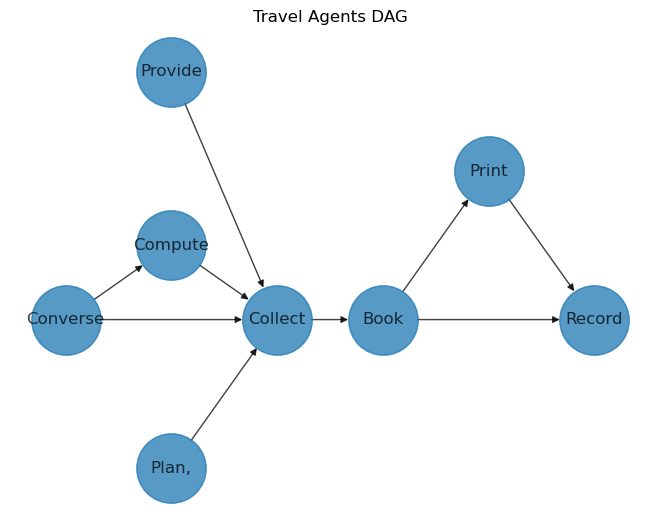

In [4]:
# Create a directed graph from the adjacency matrix
G = nx.DiGraph(adjacency_matrix)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm

# Modify node positions
pos[0] = (-.25, 0) # Collect
pos[1] = (-0.75, 0) # Converse
pos[2] = (-.5, .015) # Compute
pos[3] = (0, 0) # Book
pos[4] = (-.5, -0.03) # Plan
pos[5] = (-.5, .05) # Provide
pos[6] = (.25, .03) # Print
pos[7] = (.5, 0) # Record


# Draw the graph with modified positions and labels
nx.draw(G, pos, with_labels=True, node_size=2500, labels=node_labels, arrows=True, alpha=0.75)
plt.title("Travel Agents DAG")
plt.savefig(f'{file_path}/{occupation}_DAG_old.png')

In [5]:
# Read the adjacency matrix
occupation = 'travelAgents'
file_path = f'{data_path}/daily_tasks_occupations_analysis/{occupation}'
adjacency_matrix = pd.read_csv(f'{file_path}/{occupation}_AM.csv', index_col=0)

# keep names for node labels
task_names = adjacency_matrix.columns.tolist()
task_names = [x.split()[0] for x in task_names]
node_labels = {value: index for value, index in enumerate(task_names)}
print(node_labels) 

# convert adjacency matrix to numpy array for graph depiction
adjacency_matrix = adjacency_matrix.values
adjacency_matrix = np.nan_to_num(adjacency_matrix, nan=0.0)

{0: 'Collect', 1: 'Converse', 2: 'Compute', 3: 'Book', 4: 'Plan,', 5: 'Provide', 6: 'Print', 7: 'Record', 8: '"Sink"'}


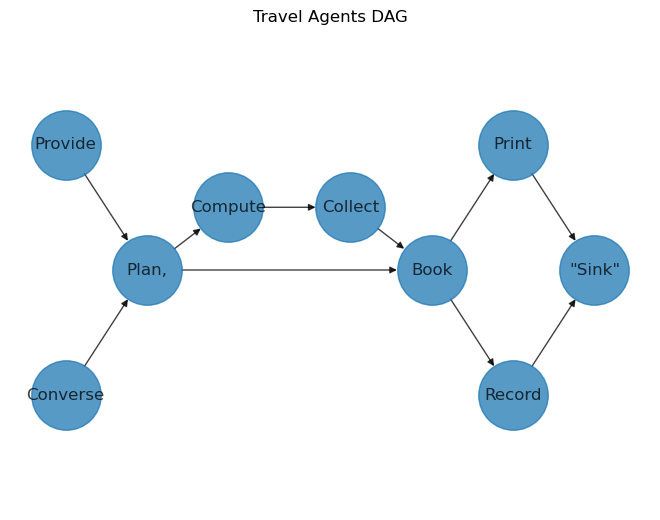

In [6]:
# Create a directed graph from the adjacency matrix
G = nx.DiGraph(adjacency_matrix)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm

# Modify node positions
pos[0] = (0, 0.0025) # Collect
pos[1] = (-1.75, -0.005) # Converse
pos[2] = (-.75, 0.0025) # Compute
pos[3] = (0.5, 0) # Book 
pos[4] = (-1.25, 0) # Plan
pos[5] = (-1.75, 0.005) # Provide
pos[6] = (1, 0.005) # Print
pos[7] = (1, -0.005) # Record
pos[8] = (1.5, 0) # Sink

# Draw the graph with modified positions and labels
nx.draw(G, pos, with_labels=True, node_size=2500, labels=node_labels, arrows=True, alpha=0.75)
plt.title("Travel Agents DAG")
plt.savefig(f'{file_path}/{occupation}_DAG.png')

## Graph of Pile Driver Operators

In [61]:
# Read the adjacency matrix
occupation = 'pileDriverOperators'
file_path = f'{data_path}/daily_tasks_occupations_analysis/{occupation}'
adjacency_matrix = pd.read_csv(f'{file_path}/{occupation}_AM.csv', index_col=0)


# keep names for node labels
task_names = adjacency_matrix.columns.tolist()
node_labels = []
for task in task_names:
    # Check if the string starts with "Move"
    if task.startswith("Move"):
        # If it does, keep the first two words
        modified_task = ' '.join(task.split()[:2])
    else:
        # Otherwise, keep the first two words as is
        modified_task = task.split()[0]
    # Add the modified string to the new list
    node_labels.append(modified_task)
node_labels = {value: index for value, index in enumerate(node_labels)}
print(node_labels)

# convert adjacency matrix to numpy array for graph depiction
adjacency_matrix = adjacency_matrix.values

{0: 'Move hand', 1: 'Conduct', 2: 'Drive', 3: 'Move levers', 4: 'Clean,'}


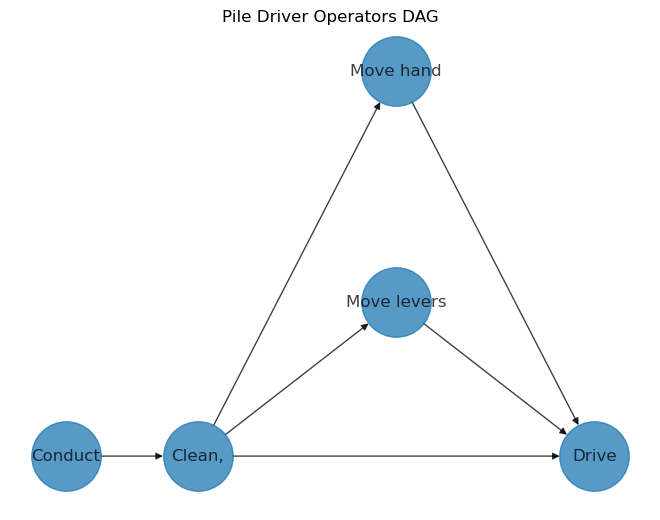

In [62]:
# Create a directed graph from the adjacency matrix
G = nx.DiGraph(adjacency_matrix)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm

# Modify node positions
pos[0] = (.25, .05) # Move hand
pos[1] = (-1, 0) # Conduct
pos[2] = (1, 0) # Drive
pos[3] = (0.25, .02) # Move levers
pos[4] = (-.5, 0) # Clean

# Draw the graph with modified positions and labels
nx.draw(G, pos, with_labels=True, node_size=2500, labels=node_labels, arrows=True, alpha=0.75)
plt.title("Pile Driver Operators DAG")
plt.savefig(f'{file_path}/{occupation}_DAG.png')

## Graph of Pile Driver Operators - Simple

In [24]:
# Read the adjacency matrix
occupation = 'pileDriverOperators'
file_path = f'{data_path}/daily_tasks_occupations_analysis/{occupation}'
adjacency_matrix = pd.read_csv(f'{file_path}/{occupation}_AM_simple.csv', index_col=0)

# keep names for node labels
task_names = adjacency_matrix.columns.tolist()
node_labels = []
for task in task_names:
    # Check if the string starts with "Move"
    if task.startswith("Move"):
        # If it does, keep the first two words
        modified_task = ' '.join(task.split()[:2])
    else:
        # Otherwise, keep the first two words as is
        modified_task = task.split()[0]
    # Add the modified string to the new list
    node_labels.append(modified_task)
node_labels = {value: index for value, index in enumerate(node_labels)}
print(node_labels)

# convert adjacency matrix to numpy array for graph depiction
adjacency_matrix = adjacency_matrix.values

{0: 'Move hand', 1: 'Conduct', 2: 'Drive', 3: 'Move levers', 4: 'Clean,'}


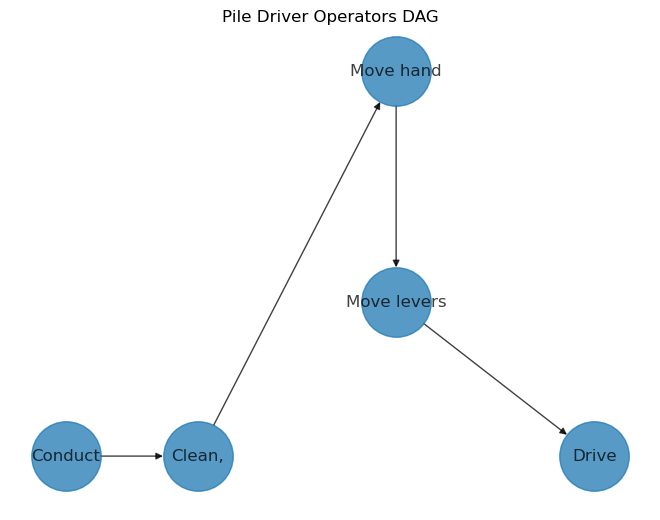

In [25]:
# Create a directed graph from the adjacency matrix
G = nx.DiGraph(adjacency_matrix)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm

# Modify node positions
pos[0] = (.25, .05) # Move hand
pos[1] = (-1, 0) # Conduct
pos[2] = (1, 0) # Drive
pos[3] = (0.25, .02) # Move levers
pos[4] = (-.5, 0) # Clean

# Draw the graph with modified positions and labels
nx.draw(G, pos, with_labels=True, node_size=2500, labels=node_labels, arrows=True, alpha=0.75)
plt.title("Pile Driver Operators DAG")
plt.savefig(f'{file_path}/{occupation}_simple_DAG.png')

## Graph of Insurance Underwriters

In [75]:
# Read the adjacency matrix
occupation = 'insuranceUnderwriters'
file_path = f'{data_path}/daily_tasks_occupations_analysis/{occupation}'
adjacency_matrix = pd.read_csv(f'{file_path}/{occupation}_AM.csv', index_col=0)

# keep names for node labels
task_names = adjacency_matrix.columns.tolist()
task_names = [x.split()[0] for x in task_names]
node_labels = {value: index for value, index in enumerate(task_names)}
print(node_labels)

# convert adjacency matrix to numpy array for graph depiction
adjacency_matrix = adjacency_matrix.values

{0: 'Decline', 1: 'Write', 2: 'Evaluate', 3: 'Decrease', 4: 'Review', 5: 'Authorize', 6: 'Examine'}


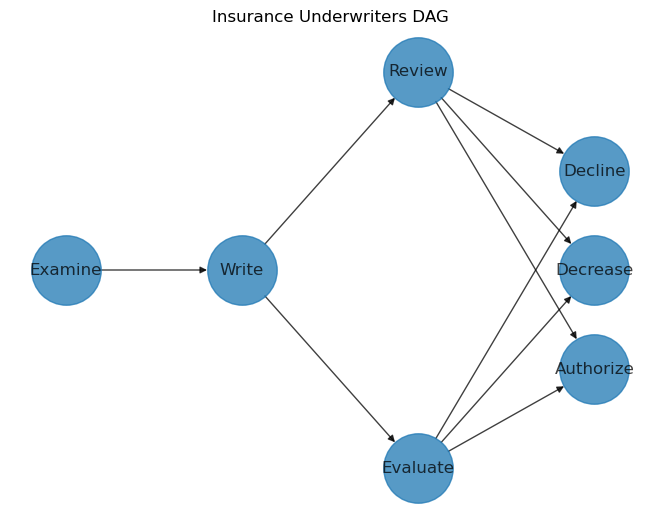

In [76]:
# Create a directed graph from the adjacency matrix
G = nx.DiGraph(adjacency_matrix)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm

# Modify node positions
pos[0] = (0.5, .1) # Decline
pos[1] = (0, 0) # Write
pos[2] = (0.25, -0.2) # Evaluate
pos[3] = (0.5, 0) # Decrease 
pos[4] = (0.25, 0.2) # Review
pos[5] = (0.5, -.1) # Authorize
pos[6] = (-.25, 0) # Examine


# Draw the graph with modified positions and labels
nx.draw(G, pos, with_labels=True, node_size=2500, labels=node_labels, arrows=True, alpha=0.75)
plt.title("Insurance Underwriters DAG")
plt.savefig(f'{file_path}/{occupation}_DAG.png')

## Graph of Shampooers

In [79]:
# Read the adjacency matrix
occupation = 'shampooers'
file_path = f'{data_path}/daily_tasks_occupations_analysis/{occupation}'
adjacency_matrix = pd.read_csv(f'{file_path}/{occupation}_AM.csv', index_col=0)

# keep names for node labels
task_names = adjacency_matrix.columns.tolist()
task_names = [x.split()[0] for x in task_names]
node_labels = {value: index for value, index in enumerate(task_names)}
print(node_labels)

# convert adjacency matrix to numpy array for graph depiction
adjacency_matrix = adjacency_matrix.values

{0: 'Massage,', 1: 'Advise', 2: 'Treat', 3: 'Maintain'}


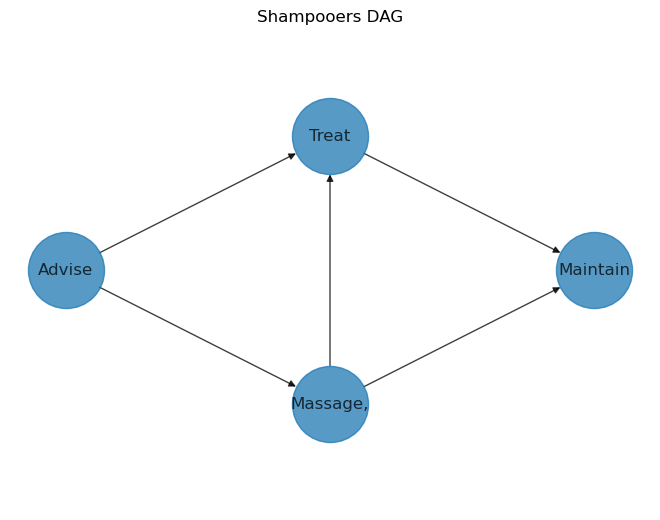

In [80]:
# Create a directed graph from the adjacency matrix
G = nx.DiGraph(adjacency_matrix)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm

# Modify node positions (if desired)
pos[0] = (0.25, -0.005) # Massage
pos[1] = (0, 0) # Advise
pos[2] = (0.25, 0.005) # Treat
pos[3] = (0.5, 0) # Maintain


# Draw the graph with modified positions and labels
nx.draw(G, pos, with_labels=True, node_size=3000, labels=node_labels, arrows=True, alpha=0.75)
plt.title("Shampooers DAG")
plt.savefig(f'{file_path}/{occupation}_DAG.png')

In [81]:
# Read the adjacency matrix
occupation = 'shampooers'
file_path = f'{data_path}/daily_tasks_occupations_analysis/{occupation}'
adjacency_matrix = pd.read_csv(f'{file_path}/{occupation}_PM.csv', index_col=0)
n_tasks = adjacency_matrix.shape[1]
adjacency_matrix = adjacency_matrix.iloc[:n_tasks, :n_tasks]

# keep names for node labels
task_names = adjacency_matrix.columns.tolist()
task_names = [x.split()[0] for x in task_names]
node_labels = {value: index for value, index in enumerate(task_names)}
print(node_labels)

# convert adjacency matrix to numpy array for graph depiction
adjacency_matrix = adjacency_matrix.values
adjacency_matrix = np.where(adjacency_matrix < 0, 1, 0)

{0: 'Massage,', 1: 'Advise', 2: 'Treat', 3: 'Maintain'}


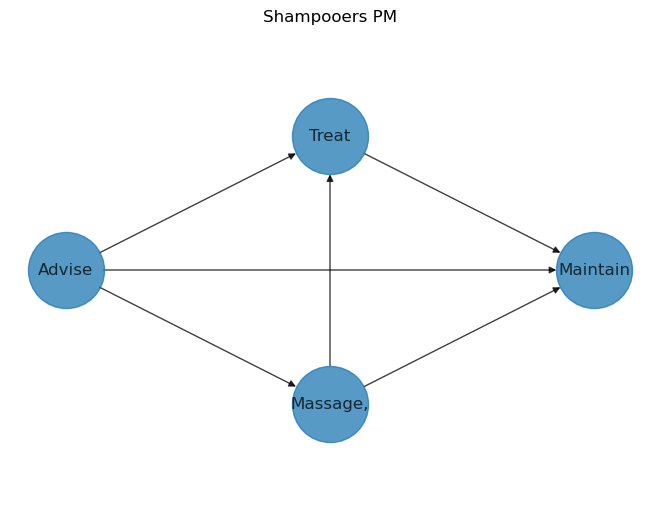

In [82]:
# Create a directed graph from the adjacency matrix
G = nx.DiGraph(adjacency_matrix)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm

# Modify node positions (if desired)
pos[0] = (0.25, -0.005) # Massage
pos[1] = (0, 0) # Advise
pos[2] = (0.25, 0.005) # Treat
pos[3] = (0.5, 0) # Maintain


# Draw the graph with modified positions and labels
nx.draw(G, pos, with_labels=True, node_size=3000, labels=node_labels, arrows=True, alpha=0.75)
plt.title("Shampooers PM")
plt.savefig(f'{file_path}/{occupation}_PM.png')

## Graph of Dredge Operators 

In [13]:
# Read the adjacency matrix
occupation = 'dredgeOperators'
file_path = f'{data_path}/daily_tasks_occupations_analysis/{occupation}'
adjacency_matrix = pd.read_csv(f'{file_path}/{occupation}_AM.csv', index_col=0)

# keep names for node labels
task_names = adjacency_matrix.columns.tolist()
task_names = [x.split()[0] for x in task_names]
node_labels = {value: index for value, index in enumerate(task_names)}
print(node_labels)

# convert adjacency matrix to numpy array for graph depiction
adjacency_matrix = adjacency_matrix.values

{0: 'Move', 1: 'Start', 2: 'Start', 3: 'Pump', 4: 'Lower', 5: 'Direct'}


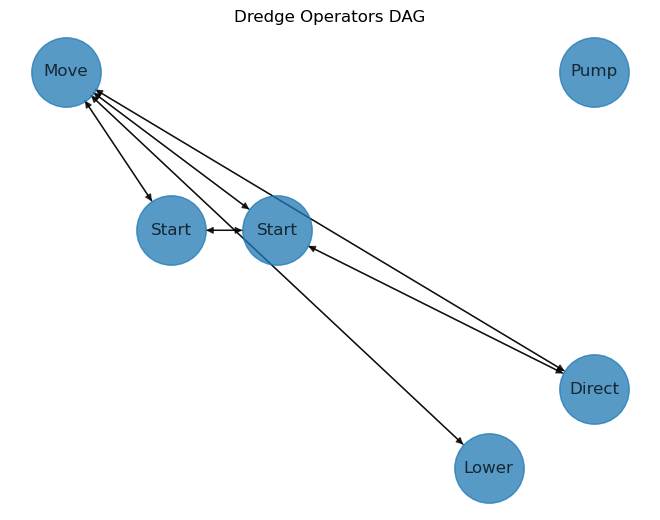

In [14]:
# Create a directed graph from the adjacency matrix
G = nx.DiGraph(adjacency_matrix)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm

# Modify node positions
pos[0] = (0, 0) # Move
pos[1] = (0.1, -.1) # Start
pos[2] = (0.2, -.1) # Start
pos[3] = (0.5, 0) # Pump 
pos[4] = (0.4, -0.25) # Lower
pos[5] = (0.5, -.2) # Direct


# Draw the graph with modified positions and labels
nx.draw(G, pos, with_labels=True, node_size=2500, labels=node_labels, arrows=True, alpha=0.75)
plt.title("Dredge Operators DAG")
plt.savefig(f'{file_path}/{occupation}_DAG.png')